# Solution to the preparatory lab 
In this notebook, we use the following modules `numpy` and `maze`. The latter is a home made module, where all the solutions to the questions are implemented. We will refer to it at each answer, and we encourage you to read it.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: The Maze and the Random Minotaur

The objective of problem 1 is to solve the maze and the random minotaur problem. We start first by describing the maze as a numpy array. 

## Part a

In [35]:
import problem1.maze as mz
# Description of the maze as a numpy array
maze = np.array([
    [2, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 3, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

The method `maze.draw_maze()` helps us draw the maze given its numpy array discription.  

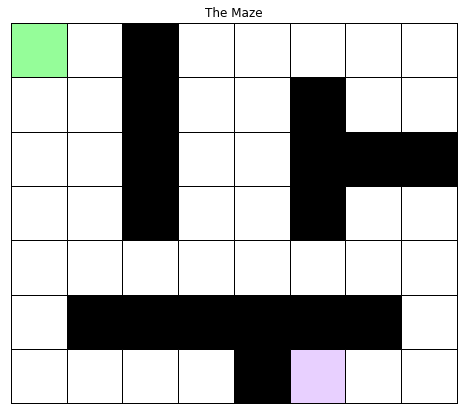

In [36]:
mz.draw_maze(maze)

## Part b

In [37]:
# Create an environment maze
MinotaurStay = False
env = mz.Maze(maze, MinotaurStay)
#env.show()

In [38]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

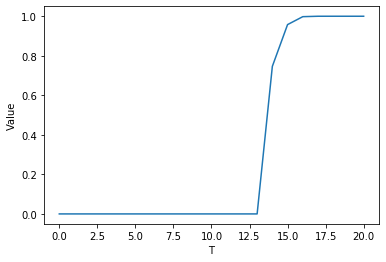

In [42]:
start  = (0,0,6,5)
value = np.flip(V[env.map[start]])
plt.plot(value)
plt.ylabel("Value")
plt.xlabel("T")
plt.show()

In [25]:
# Simulate the shortest path starting from position A
method = 'DynProg';
path = env.simulate(start, policy, method);
print(path)

[(0, 0, 6, 5), (0, 0, 6, 3), (0, 1, 4, 3), (1, 1, 3, 3), (2, 1, 3, 4), (3, 1, 3, 3), (4, 1, 2, 3), (4, 1, 3, 3), (4, 2, 4, 3), (4, 3, 6, 3), (4, 4, 6, 2), (4, 4, 6, 1), (4, 4, 6, 2), (4, 4, 6, 1), (4, 5, 4, 1), (4, 6, 6, 1), (4, 6, 6, 0), (4, 7, 5, 0), (5, 7, 4, 0), (6, 7, 3, 0), (6, 6, 4, 0), (6, 5, 3, 0)]


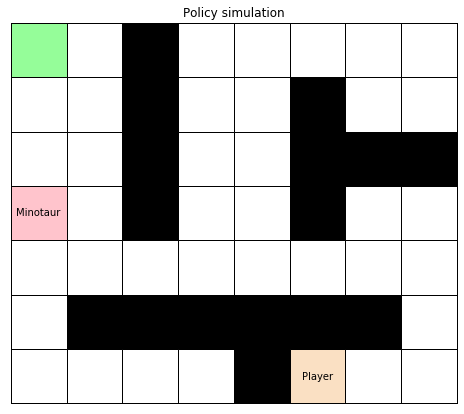

In [26]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

## Value Iteration

## Part C

In [31]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon)


In [32]:
num_simulations = 10000
method = 'ValIter';
start  = (0,0,6,5);
exit = 0
for i in range(num_simulations):
    path = env.simulate(start, policy, method)
    if[path[-1][0:2] == start[2:]]:
        exit +=1
print("Probability of exiting the maze =", exit/num_simulations)

Probability of exiting the maze = 1.0


# Problem 2: Robbing Banks

The objective of problem 2 is to solve the robbing banks problem. We start first by describing the maze as a numpy array. 

In [13]:
import numpy as np
import problem2.maze as mz

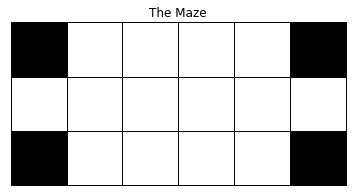

In [14]:
maze = np.array([
    [1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1],
])
# Description of the maze as a numpy array
# with the convention 
# 0 = empty cell
# 1 = bank
mz.draw_maze(maze)

## MDP formulation

In [15]:
# Create an environment maze
env = mz.Maze(maze)
#env.show()

## Dynamic Programming

In [16]:
# Finite horizon
horizon = 30
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)

In [17]:
# Simulate the shortest path starting from position A
method = 'DynProg'
start  = (0, 0, 1, 2)
path = env.simulate(start, policy, method);

KeyboardInterrupt: 

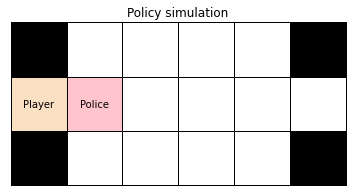

In [9]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

## Value Iteration

In [18]:
# Discount Factor 
gamma   = 0.95
# Accuracy treshold 
epsilon = 0.0001
V, policy = mz.value_iteration(env, gamma, epsilon)

In [19]:
method = 'ValIter'
start  = (0, 0, 1, 2)
path = env.simulate(start, policy, method)

KeyboardInterrupt: 

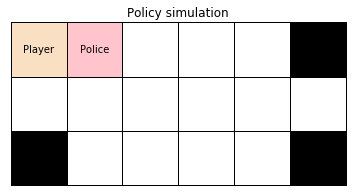

In [20]:
# Show the shortest path 
mz.animate_solution(maze, path, start)

# Problem 3

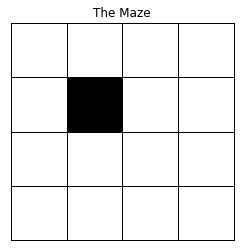

In [21]:
import numpy as np
import problem3.maze as mz

# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = bank
mz.draw_maze(maze)

# Create an environment maze
env = mz.Maze(maze)

#env.show()

## Q-learning

In [26]:
# Q-learning for different intial states
initialStates = [(0,0,3,3), (3,3,0,0), (2,2,2,2), (1,3,2,2)]
value = []
for i, s in enumerate(initialStates):
    print(i)
    Q, v = mz.Q_learning(env,iters=100000, start = s)
    value.append(v)                                                 

0
1
2
3


In [27]:
print(np.max(Q))
print(Q)

4.1632709155099645
[[ 1.91507904  1.89752887 -3.11434458  1.88495961 -3.06923988]
 [-1.71178769 -1.7306185   2.41038753 -1.70757017  2.39877906]
 [ 2.09406217  2.11085684 -0.8835537   2.08983263  2.30398868]
 ...
 [ 1.32238622 -1.96403638  1.31312894  1.52219452  1.31721116]
 [-2.24837786  1.7527653  -2.26239944  1.78167233 -2.25836767]
 [ 1.29195577 -3.53170155  1.35014905 -3.47855905  1.35179144]]


/Users/jonrunar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


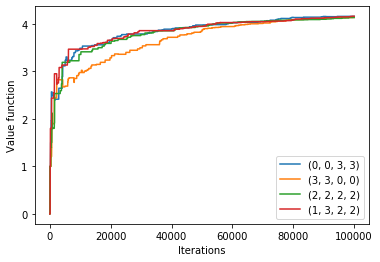

In [28]:
# Plot it
from matplotlib import pyplot as plt
for i in range(len(value)):
    plt.plot(value[i], label=str(initialStates[i]))
plt.xlabel("Iterations")
plt.ylabel("Value function")
plt.legend()
plt.show()

## SARSA

In [30]:
# Sarsa for different epsilons
initialState = (0,0,3,3)
epsilons = [0.0, 0.1, 0.2, 0.5, 0.8, 1.0]
value = []
for i,e in enumerate(epsilons):
    print(i)
    Q, v = mz.Sarsa(env,iters=100000, start = initialState, epsilon=e)
    value.append(v)

0
1
2
3
4
5


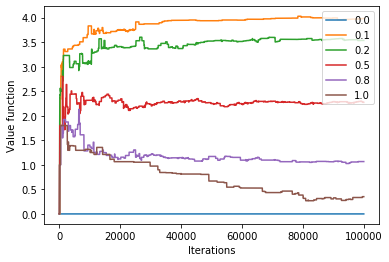

In [31]:
# Plot it
from matplotlib import pyplot as plt
for i in range(len(value)):
    l = str(epsilons[i])
    plt.plot(value[i], label=l)
plt.xlabel("Iterations")
plt.ylabel("Value function")
plt.legend(loc=1)
plt.show()